# Document Statistics

<b>Author: Anthony Nwachukwu  <br>Email: nwachukwuanthony2015@gmail.com  <br>Date: 22/03/2019</b>

#### Description
1. Get a document from the web and write it as text file to a folder
2. Read the document into a variable
3. Clean it; remove all punctuations and endlines
4. Convert it to dictionary of words and their frequences
5. Print the Summary statistics
6. Plot the histogram of words' frequencies

## Import Libraries needed

In [1]:
import urllib.request
import string
import numpy as np
import matplotlib.pyplot as plt


## Extract document from the web and write it as text file to a folder

In [2]:
def downloadFile(url,saveAs):
    import urllib.request
    urllib.request.urlretrieve(url,saveAs)

In [3]:
#downloadFile('http://www.gutenberg.org/cache/epub/1661/pg1661.txt','book1.txt')

## Preprocess Document
Cleans the Documents when called, removes the endlines and removes punctuations and define start and end line

In [4]:
def documentPreClean(document,startends,endbegins):
    #Convert line breaks to space hence changing the document to a line string
    with open(document, 'r') as myfile:
        data=myfile.read().replace('\n', ' ')
        data = data[data.find(startends)+len(startends):]
        data = data[:data.find(endbegins)+1]
    #Remove punctuations
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    return(data.translate(translator))

## Preprocess Document (part 2)
The characters or strings that persists after the first state, handle them and remove them here <br>
<b><u>Example</u></b> <br><b>removeForbiddenCharacters('Document.txt',['\t','@'])</b>

In [5]:
def removeStubornCharacters(document,startends="",endbegins="",forbidden=['\t']):
    #Remove unwanted strings not captured above
    page = documentPreClean(document,startends,endbegins)
    for item in forbidden:
        page.translate({ord(item): None})
    return(page)
    #return([w.lower() for w in splitedPage])

## Create dictionary of words frequencies

In [6]:
def wordFrequencies(document,startends="",endbegins="",forbidden=['\t']):
    doc = removeStubornCharacters(document,startends,endbegins)
    doc = doc.split()
    doc = [w.lower() for w in doc]
    key = set(doc)
    dic = dict.fromkeys(key,0 )
    for word in doc:
        dic[word] += 1
    return(dic)

## Perform Descriptive Statistics

In [7]:
def descriptiveStat(x):
    
    n = 0
    fr = np.array(list(x.values()))
    print(' ')
    print('WORD STATISTICS')
    print('=//==//===//====//=====//======//=======//=')
    print(' ')
    print ('| Total word counts:', sum(fr))
    d = ['Least','Highest','Median']
    #occ = len([v for v in x.values() if v == np.min(fr)])
    for nu in [np.min(fr),np.max(fr),np.median(fr)]:
        i=0
        print(' ')
        print (d[n]+' word(s) [frequency-'+str(nu)+']:')
        print('==================================')
        occ = list(x.values()).count(nu)
        for w in x.keys():
            if x[w] == nu:
                print('|   <'+w+'>')
                if i == 6:
                    print('|   ... '+str(occ-6)+ ' words')
                    break
                i += 1
        n += 1


## Run the code here

In [8]:
wordFreq = wordFrequencies('book.txt','SHERLOCK HOLMES ***','*** END OF THIS',)

descriptiveStat(wordFreq)

 
WORD STATISTICS
=//==//===//====//=====//======//=======//=
 
| Total word counts: 106025
 
Least word(s) [frequency-1]:
|   <grain>
|   <irish>
|   <ruffians>
|   <slumber>
|   <span>
|   <vestas>
|   <comment>
|   ... 3497 words
 
Highest word(s) [frequency-5632]:
|   <the>
 
Median word(s) [frequency-2.0]:
|   <bewilderment>
|   <kramm>
|   <sickness>
|   <purport>
|   <inward>
|   <grinning>
|   <restraint>
|   ... 1261 words


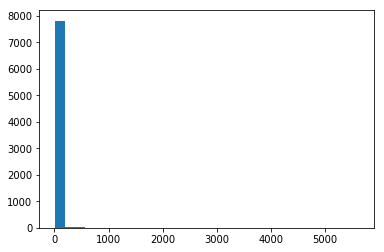

In [9]:
fr = np.array(list(wordFreq.values()))
plt.hist(wordFreq.values(),30);

In [10]:
wordFrequencies('book.txt','SHERLOCK HOLMES ***','*** END OF THIS',)

{'grain': 1,
 'irish': 1,
 'ruffians': 1,
 'entirely': 19,
 'slumber': 1,
 'wire': 4,
 'span': 1,
 'bewilderment': 2,
 'briony': 11,
 'vestas': 1,
 'comment': 1,
 'isle': 1,
 'kramm': 2,
 'hesitated': 3,
 'contemptuous': 1,
 'incredible': 1,
 'simon': 40,
 'violet': 4,
 'dried': 7,
 'secret': 20,
 'horror': 12,
 'brownish': 1,
 'refused': 7,
 'sickness': 2,
 'temples': 1,
 'pea': 3,
 'crowder': 3,
 'vehemence': 1,
 'learn': 11,
 'awake': 4,
 'accommodate': 1,
 'creeping': 1,
 'crushing': 1,
 'remorseless': 1,
 'box': 19,
 'undid': 1,
 'improbabilities': 1,
 'satisfy': 3,
 'shadows': 1,
 'purport': 2,
 'situation': 13,
 'turf': 1,
 'discontent': 1,
 'feeling': 17,
 'destined': 1,
 'aisle': 1,
 'inward': 2,
 'gold': 18,
 'grinning': 2,
 'recourse': 1,
 'supply': 5,
 'thresholds': 1,
 'plainer': 1,
 'ill': 12,
 'explains': 1,
 'conventions': 1,
 'figures': 4,
 'increasing': 1,
 'grateful': 1,
 'our': 208,
 'view': 15,
 'counts': 1,
 'if': 260,
 'offering': 1,
 'slight': 15,
 'cheating': 1